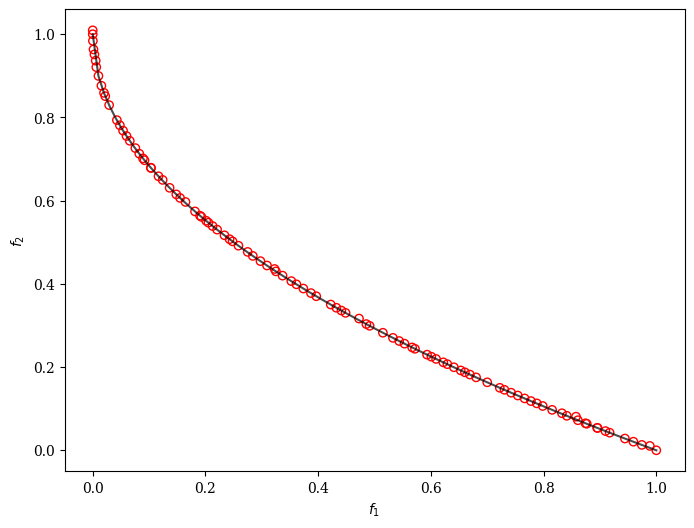

In [24]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import seaborn

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

# Starcraft build orders

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import functools

In [5]:
# A solution dominates another solution if in all of the objectives, it is better or equal and in atleast one, it is better

def dominates(fitness_1, fitness_2):
    larger_or_equal = fitness_1 >= fitness_2
    larger = fitness_1 > fitness_2
    if np.all(larger_or_equal) and np.any(larger):
        return True
    return False

# A set of solutions that do not dominate each other is the pareto front.
# when there is no solution that dominates any of the members of the front, it is the optimal pareto front.
# The goal of multiobjective optimization is to find the optimal pareto front.

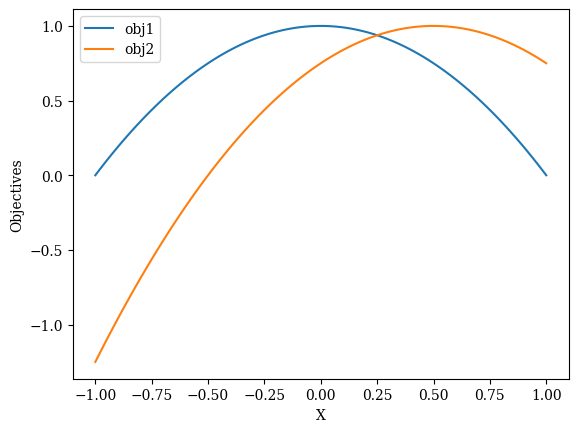

Text(0, 0.5, 'obj1')

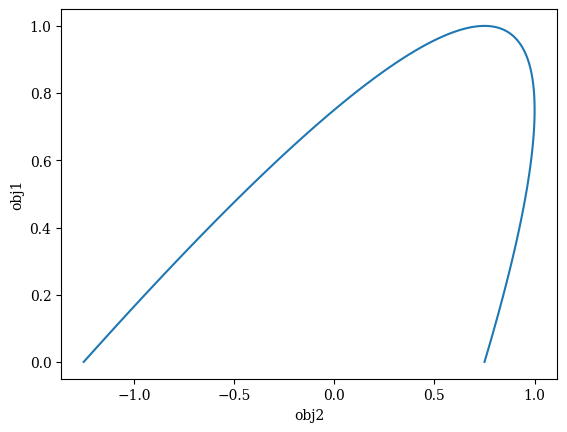

In [7]:
# Find the optimal build orders for starcraft
# Optimization fronts:
# Size of the economy after 5 minutes
# Size of the army after 5 minutes

def obj1(x):
    return 1 - x * x

def obj2(x):
    return 1 - (x-0.5) * (x-0.5)

# Plot the objectives for all possible x
x = np.linspace(-1, 1, 100)
plt.plot(x, obj1(x))
plt.plot(x, obj2(x))
plt.xlabel("X")
plt.ylabel("Objectives")
plt.legend(["obj1","obj2"])
plt.show()
# and plot the objectives against each other
plt.plot(obj2(x),obj1(x))
plt.xlabel("obj2")
plt.ylabel("obj1")

# Brute force solution

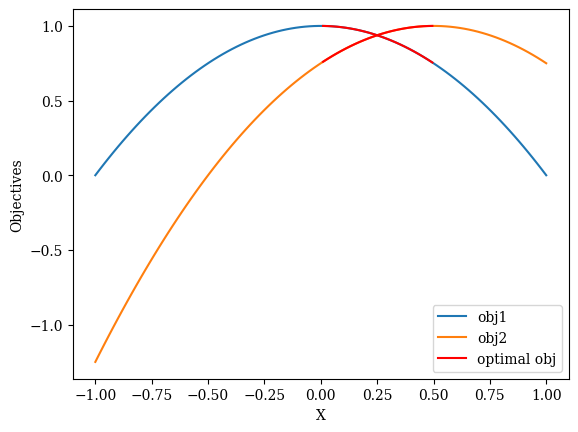

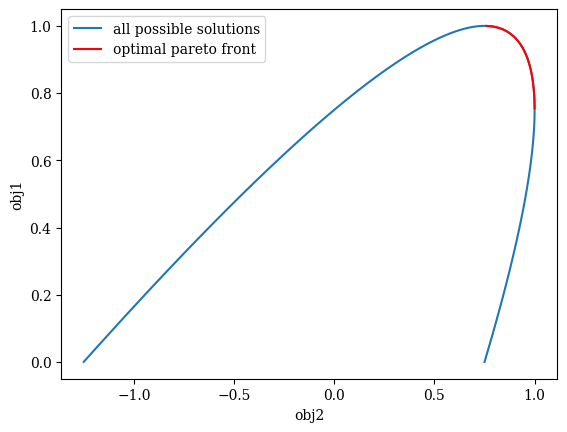

In [10]:
all_possible_solutions = np.linspace(-1, 1, 100)
all_fitness = np.stack(
    [obj1(all_possible_solutions), obj2(all_possible_solutions)],
    axis=1
)

nondominated_indicies = []
for i in range(len(all_possible_solutions)):
    dominated = False
    for j in range(len(all_possible_solutions)):
        if dominates(all_fitness[j], all_fitness[i]):
            dominated = True
            break
    if not dominated:
        nondominated_indicies.append(i)

nondominated_solutions = all_possible_solutions[nondominated_indicies]

# Plot the optimal values togeather with all values
plt.plot(x,obj1(x))
plt.plot(x,obj2(x))
plt.plot(x[nondominated_indicies],obj1(x)[nondominated_indicies],color="red")
plt.plot(x[nondominated_indicies],obj2(x)[nondominated_indicies],color="red")
plt.xlabel("X")
plt.ylabel("Objectives")
plt.legend(["obj1","obj2","optimal obj"])
plt.show()

plt.plot(obj2(x),obj1(x))
plt.plot(obj2(x)[nondominated_indicies],obj1(x)[nondominated_indicies],color="red")
plt.xlabel("obj2")
plt.ylabel("obj1")
plt.legend(["all possible solutions","optimal pareto front"])

# Non dominated sorting: naive approach (worst case O(M N^3))

Front: [10, 20, 34, 36, 47, 65, 70, 93]
Front: [4, 5, 13, 15, 56, 58, 88, 96]
Front: [2, 14, 41, 48, 51, 57, 78, 80, 81, 98, 99]
Front: [30, 38, 52, 66, 71, 79, 89]
Front: [8, 12, 17, 39, 44, 45, 86, 97]
Front: [23, 24, 27, 28, 74, 84, 92, 94]
Front: [19, 29, 33, 35, 43, 54, 60, 75, 87]
Front: [1, 9, 21, 22, 46, 50, 55, 63, 69, 85, 95]
Front: [7, 16, 25, 37, 59, 61, 90]
Front: [3, 18, 26, 32, 40, 53, 62, 72, 76]
Front: [6, 49, 77, 91]
Front: [64, 82, 83]
Front: [11, 67]
Front: [31, 73]
Front: [0, 42, 68]
Done


Text(0, 0.5, 'obj2')

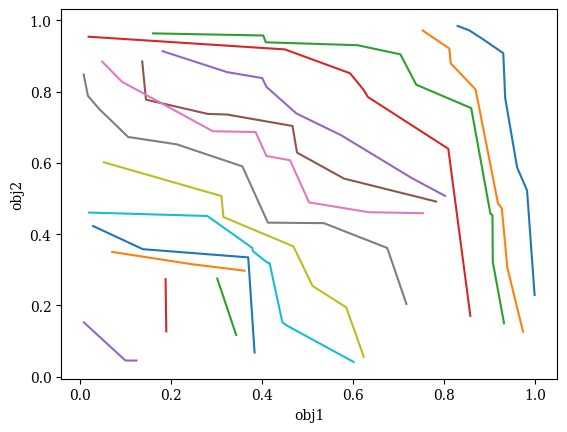

In [13]:
# We need to rank individuals
# Calculate the front they belong to
# Individuals that are not dominated belong to the first front
# Temporarily remove the first front and calculated the individuals that are not dominated in the reduced set
# This becomes the second front

pop_size = 100
all_fitness = np.random.rand(pop_size, 2)

fronts = []
remaining_indices = list(range(pop_size))

while True:
    non_dominated_indices = []

    for i in remaining_indices:
        dominated = False
        for j in remaining_indices:
            if dominates(all_fitness[j], all_fitness[i]):
                dominated = True
                break

        if not dominated:
            non_dominated_indices.append(i)

    print(f"Front: {non_dominated_indices}")

    # Remove current front and remaining indices
    fronts.append(non_dominated_indices)
    remaining_indices = [x for x in remaining_indices if x not in non_dominated_indices]

    if len(remaining_indices) == 0:
        print("Done")
        break

# Plot the fronts
for i in range(len(fronts)):
    sorted_Front = sorted(fronts[i], key=lambda x: all_fitness[x, 0])
    plt.plot(all_fitness[sorted_Front, 0], all_fitness[sorted_Front, 1])

plt.xlabel("obj1")
plt.ylabel("obj2")

# Non dominated sorted: fast

[array([10, 20, 34, 36, 47, 65, 70, 93]),
 array([ 4,  5, 13, 15, 56, 58, 88, 96]),
 array([ 2, 14, 41, 48, 51, 57, 78, 80, 81, 98, 99]),
 array([30, 38, 52, 66, 71, 79, 89]),
 array([ 8, 12, 17, 39, 44, 45, 86, 97]),
 array([23, 24, 27, 28, 74, 84, 92, 94]),
 array([19, 29, 33, 35, 43, 54, 60, 75, 87]),
 array([ 1,  9, 21, 22, 46, 50, 55, 63, 69, 85, 95]),
 array([ 7, 16, 25, 37, 59, 61, 90]),
 array([ 3, 18, 26, 32, 40, 53, 62, 72, 76]),
 array([ 6, 49, 77, 91]),
 array([64, 82, 83]),
 array([11, 67]),
 array([31, 73]),
 array([ 0, 42, 68])]

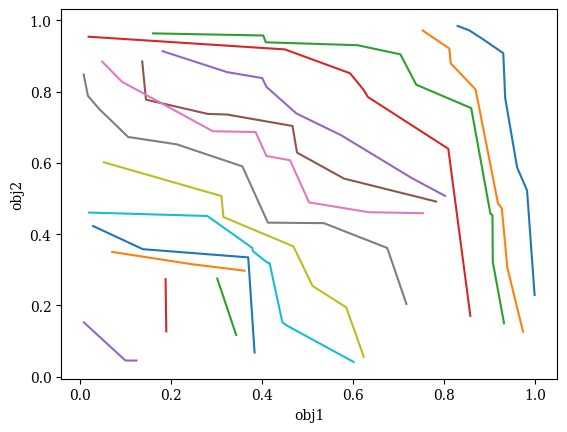

In [19]:
# pre-calculate domination set for each individual (the set of other individuals this individual dominates)
# pre-calculate domination counts
# The fronts are simple:
# The current front is the individuals whose domination count is 0
# visit everyone in the current fronts domination set and reduce their domination count
# remove current front and repeat


def calculate_pareto_fronts(fitnesses):

    # Calculate dominated set for each individual
    domination_sets = []
    domination_counts = []
    for fitnesses_1 in fitnesses:
        current_dimination_set = set()
        domination_counts.append(0)
        for i,fitnesses_2 in enumerate(fitnesses):
            if dominates(fitnesses_1,fitnesses_2):
                current_dimination_set.add(i)
            elif dominates(fitnesses_2,fitnesses_1):
                domination_counts[-1] += 1

        domination_sets.append(current_dimination_set)

    domination_counts = np.array(domination_counts)
    fronts = []
    while True:
        current_front = np.where(domination_counts==0)[0]
        if len(current_front) == 0:
            #print("Done")
            break
        #print("Front: ",current_front)
        fronts.append(current_front)

        for individual in current_front:
            domination_counts[individual] = -1 # this individual is already accounted for, make it -1 so  ==0 will not find it anymore
            dominated_by_current_set = domination_sets[individual]
            for dominated_by_current in dominated_by_current_set:
                domination_counts[dominated_by_current] -= 1

    return fronts



fronts = calculate_pareto_fronts(all_fitness)

# Let us plot the fronts
legends = []
for i in range(len(fronts)):
    # before plotting, sort by obj 1
    sorted_front = sorted(fronts[i],key=lambda x : all_fitness[x,0])
    plt.plot(all_fitness[sorted_front,0],all_fitness[sorted_front,1])

plt.xlabel("obj1")
plt.ylabel("obj2")
fronts

Text(0.5, 1.0, 'Point size indicates crowdedness (smaller more crowded)')

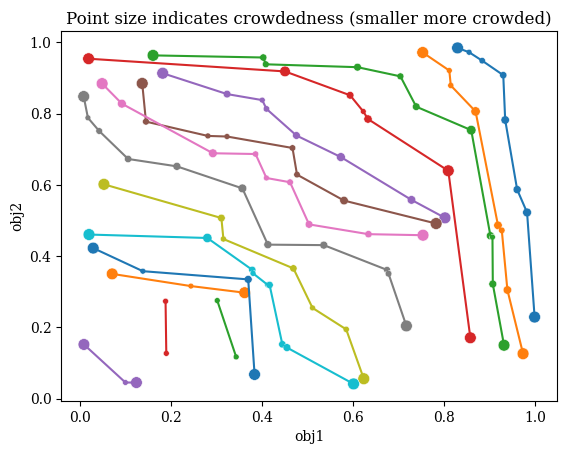

In [25]:
# Explore different tradeoffs
# Encourage diversity in the population
# NSGI-II uses a crowding metric to do this
# based on manhatten distance of neighbours in a front


def calculate_crowding_metrics(fitnesses, fronts):

    num_objectives = fitnesses.shape[1]
    num_individuals = fitnesses.shape[0]

    # Normalize each objective in the range 0, 1
    normalized_fitnesses = np.zeros_like(fitnesses)
    for objective_i in range(num_objectives):
        min_val = np.min(fitnesses[:, objective_i])
        max_val = np.max(fitnesses[:, objective_i])
        val_range = max_val - min_val
        normalized_fitnesses[:, objective_i] = (fitnesses[:, objective_i] - min_val) / val_range

    fitnesses = normalized_fitnesses
    crowding_metrics = np.zeros(num_individuals)

    for front in fronts:
        for objective_i in range(num_objectives):
            sorted_front = sorted(front, key=lambda x: fitnesses[x, objective_i])
            crowding_metrics[sorted_front[0]] = np.inf
            crowding_metrics[sorted_front[-1]] = np.inf
            if len(sorted_front) > 2:
                for i in range(1, len(sorted_front)-1):
                    crowding_metrics[sorted_front[i]] += fitnesses[sorted_front[i+1], objective_i] - fitnesses[sorted_front[i-1], objective_i]
    return crowding_metrics

crowding_metrics = calculate_crowding_metrics(all_fitness, fronts)
crowding_metrics[crowding_metrics==np.inf] = np.max(crowding_metrics[crowding_metrics!=np.inf])

all_fitnesses = all_fitness

for i in range(len(fronts)):
    # before plotting, sort by obj 1
    sorted_front = sorted(fronts[i],key=lambda x : all_fitnesses[x,0])
    plt.plot(all_fitnesses[sorted_front,0],all_fitnesses[sorted_front,1])#,".")
    seaborn.scatterplot(x=all_fitnesses[sorted_front,0],y=all_fitnesses[sorted_front,1],size=crowding_metrics[sorted_front],legend=False)
plt.xlabel("obj1")
plt.ylabel("obj2")
plt.title("Point size indicates crowdedness (smaller more crowded)")

# Putting it all together

In [32]:
def fronts_to_nondomination_rank(fronts):
    nondomination_rank_dict = {}
    for i,front in enumerate(fronts):
        for x in front:
            nondomination_rank_dict[x] = i
    return nondomination_rank_dict


def nondominated_sort(nondomination_rank_dict,crowding):

    num_individuals = len(crowding)
    indicies = list(range(num_individuals))

    def nondominated_compare(a,b):
        # returns 1 if a dominates b, or if they equal, but a is less crowded
        # return -1 if b dominates a, or if they equal, but b is less crowded
        # returns 0 if they are equal in every sense


        if nondomination_rank_dict[a] > nondomination_rank_dict[b]:  # domination rank, smaller better
            return -1
        elif nondomination_rank_dict[a] < nondomination_rank_dict[b]:
            return 1
        else:
            if crowding[a] < crowding[b]:   # crowding metrics, larger better
                return -1
            elif crowding[a] > crowding[b]:
                return 1
            else:
                return 0

    non_domiated_sorted_indicies = sorted(indicies,key = functools.cmp_to_key(nondominated_compare),reverse=True) # decreasing order, the best is the first
    return non_domiated_sorted_indicies

# Some generic GA functions
def touranment_selection(num_parents,num_offspring):
    offspring_parents = []
    for _ in range(num_offspring):
        contestants = np.random.randint(0,num_parents,2) # generate 2 random numbers, take the smaller (parent list is already sorted, smaller index, better)
        winner = np.min(contestants)
        offspring_parents.append(winner)

    return offspring_parents

# simple mutation
def get_mutated_copy(parent,min_val,max_val,mutation_power_ratio):
    mutation_power = (max_val - min_val) * mutation_power_ratio
    offspring = parent.copy()
    offspring += np.random.normal(0,mutation_power,size = offspring.shape)
    offspring = np.clip(offspring,min_val,max_val)
    return offspring



def NSGA2_create_next_generation(pop,fitnesses,config):

    # algorithm and task parameters
    half_pop_size = config["half_pop_size"]
    problem_dim = config["problem_dim"]
    gene_min_val = config["gene_min_val"]
    gene_max_val = config["gene_max_val"]
    mutation_power_ratio = config["mutation_power_ratio"]

    # calculate the pareto fronts and crowding metrics
    fronts = calculate_pareto_fronts(fitnesses)
    nondomination_rank_dict = fronts_to_nondomination_rank(fronts)

    crowding = calculate_crowding_metrics(fitnesses,fronts)

    # Sort the population
    non_domiated_sorted_indicies = nondominated_sort(nondomination_rank_dict,crowding)

    # The better half of the population survives to the next generation and have a chance to reproduce
    # The rest of the population is discarded
    surviving_individuals = pop[non_domiated_sorted_indicies[:half_pop_size]]
    #print(len(surviving_individuals))
    reproducing_individual_indicies = touranment_selection(num_parents=half_pop_size,num_offspring=half_pop_size)
    offsprings = np.array([get_mutated_copy(surviving_individuals[i],gene_min_val,gene_max_val,mutation_power_ratio) for i in reproducing_individual_indicies])

    new_pop = np.concatenate([surviving_individuals,offsprings])  # concatenate the 2 lists
    return new_pop

# Solving toy problem

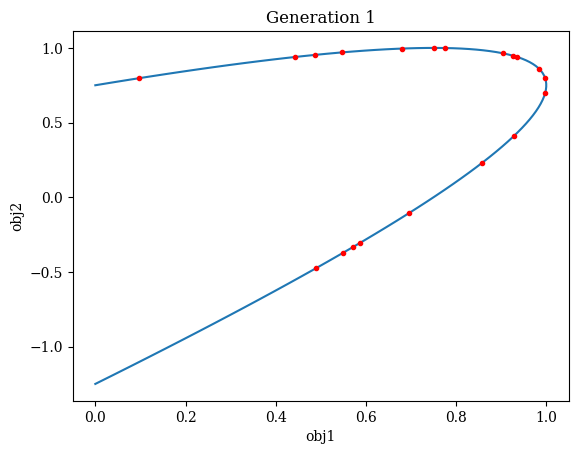

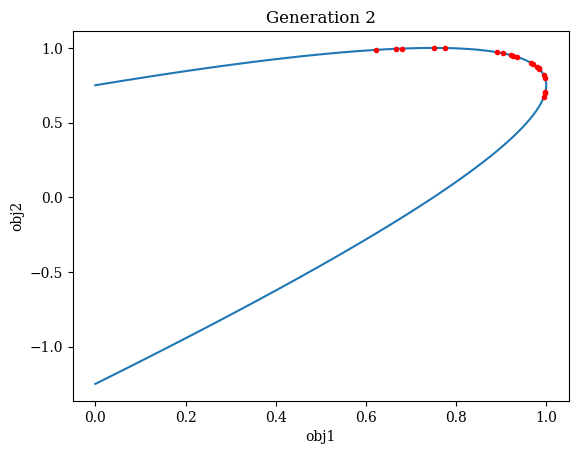

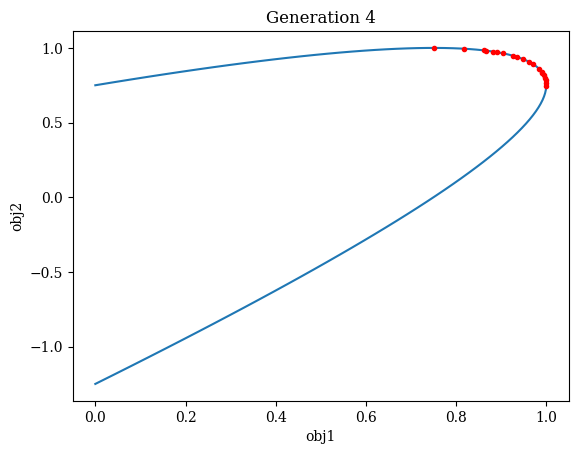

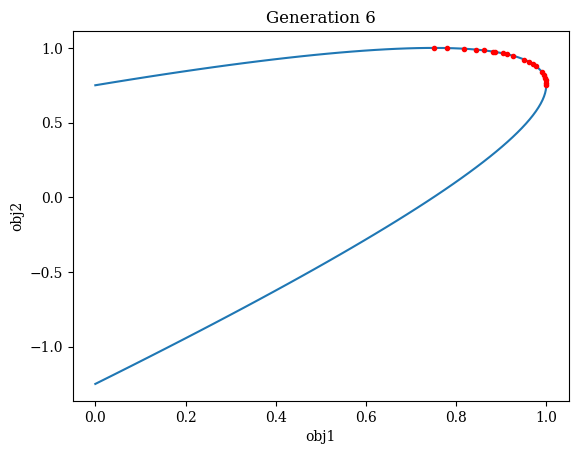

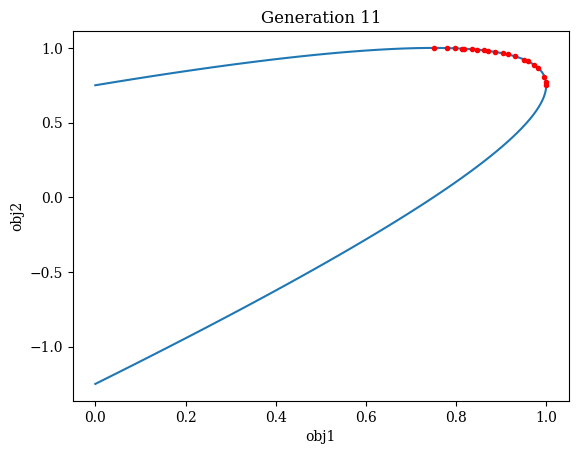

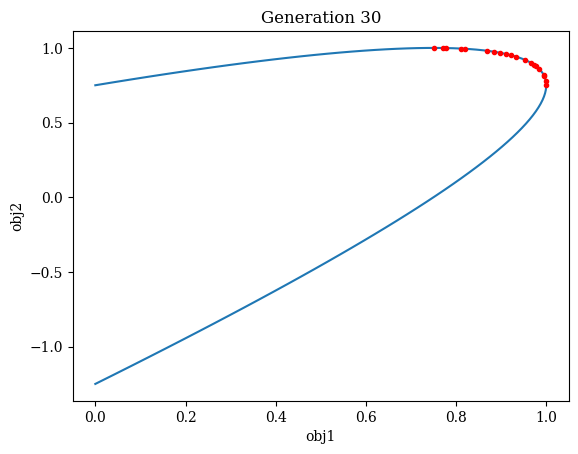

In [46]:
def simple_1d_fitness_func(x):
    objective_1 = 1-(x * x)
    objective_2 = 1-((x-0.5) * (x-0.5))
    return np.stack([objective_1,objective_2],axis=1)

config = {
    "half_pop_size" : 20,
    "problem_dim" : 1,
    "gene_min_val" : -1,
    "gene_max_val" : 1,
    "mutation_power_ratio" : 0.05,
}

pop = np.random.uniform(config["gene_min_val"],config["gene_max_val"],2*config["half_pop_size"])

mean_fitnesses = []
plot_iterations = [0, 1, 3, 5, 10, 29]
for generation in range(30):

    # evaluate pop
    fitnesses = simple_1d_fitness_func(pop)
    mean_fitnesses.append(np.mean(fitnesses,axis=0))

    # transition to next generation
    pop = NSGA2_create_next_generation(pop,fitnesses,config)

    # Check if we found the same solutions as the brute force method
    if generation in plot_iterations:
        x = np.linspace(-1,1,100)
        all_solutions_fitnesses = simple_1d_fitness_func(x)
        plt.figure()
        plt.title(f"Generation {generation+1}")
        # plt.plot(x, fitnesses[:config["half_pop_size"],0]
        plt.plot(all_solutions_fitnesses[:,0],all_solutions_fitnesses[:,1])
        plt.plot(fitnesses[:config["half_pop_size"],0],fitnesses[:config["half_pop_size"],1],".",color="red")
        plt.xlabel("obj1")
        plt.ylabel("obj2")
        plt.show()

# More complex problem

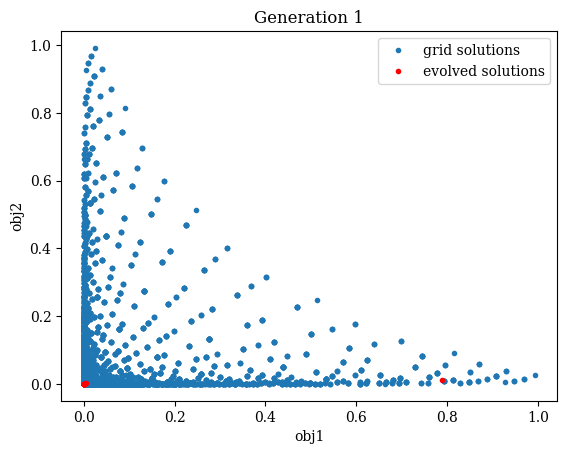

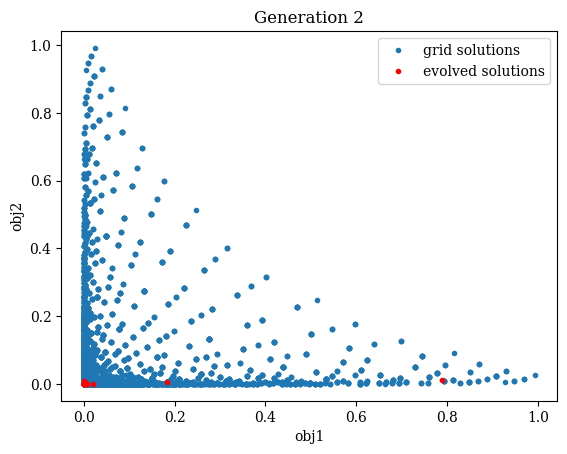

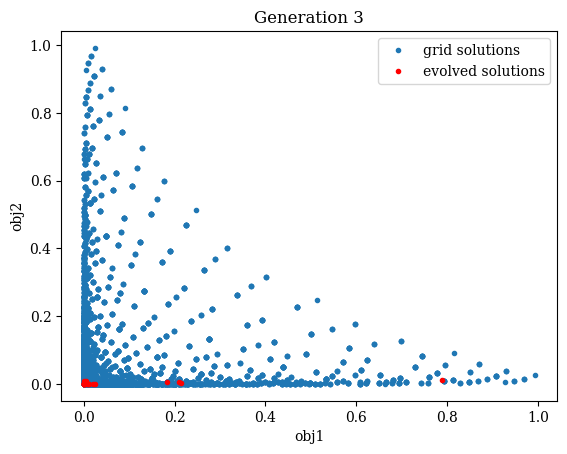

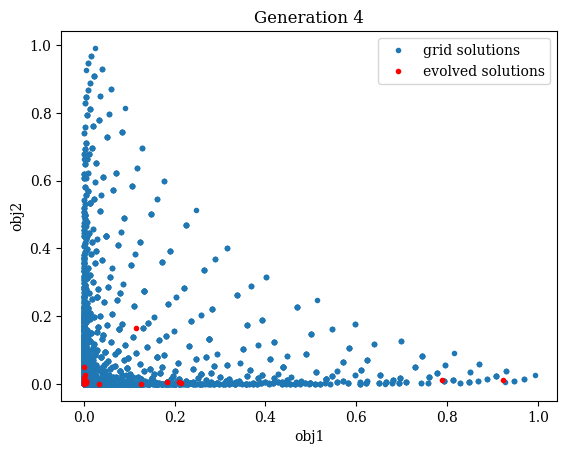

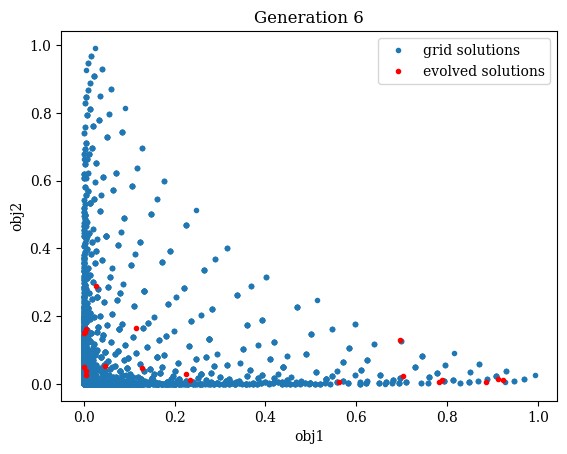

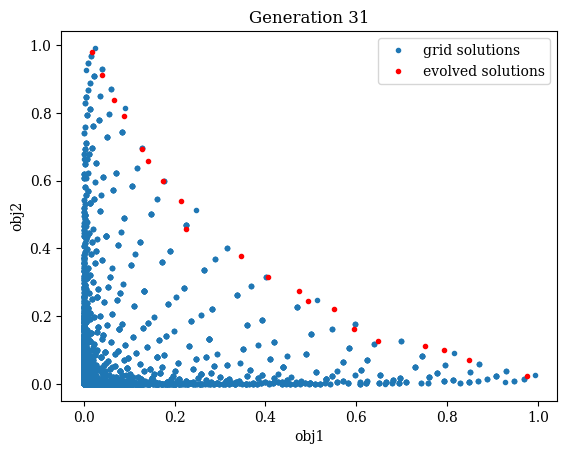

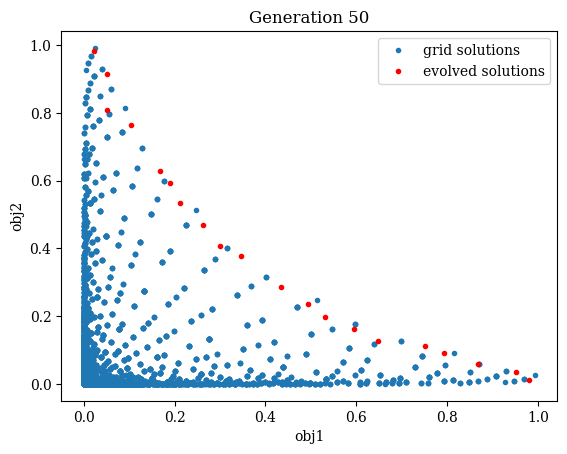

In [49]:
def FON_fitness_func(x):
    val = 1 / np.sqrt(3)
    objective_1 = np.exp( - ( (x[:,0]-val)*(x[:,0]-val) + (x[:,1]-val)*(x[:,1]-val) + (x[:,2]-val)*(x[:,2]-val)))
    objective_2 = np.exp( - ( (x[:,0]+val)*(x[:,0]+val) + (x[:,1]+val)*(x[:,1]+val) + (x[:,2]+val)*(x[:,2]+val)))
    return np.stack([objective_1,objective_2],axis=1)

config = {
    "half_pop_size" : 20,
    "problem_dim" : 3,
    "gene_min_val" : -4,
    "gene_max_val" : 4,
    "mutation_power_ratio" : 0.05,
}

pop = np.random.uniform(config["gene_min_val"],config["gene_max_val"],(2*config["half_pop_size"],3))

# To compare the found solutions with other values, we check all solutions in a grid
grid_3d = []
for x in np.linspace(-2,2,20):
    for y in np.linspace(-2,2,20):
        for z in np.linspace(-2,2,20):
            grid_3d.append([x,y,z])
grid_3d = np.array(grid_3d)
all_fitnesses = FON_fitness_func(grid_3d)


mean_fitnesses = []
plot_generations = [0, 1, 2, 3, 5, 30, 49]
for generation in range(50):

    # evaluate pop
    fitnesses = FON_fitness_func(pop)
    mean_fitnesses.append(np.mean(fitnesses,axis=0))

    # transition to next generation
    pop = NSGA2_create_next_generation(pop,fitnesses,config)

    if generation in plot_generations:
        plt.figure()
        plt.title(f"Generation {generation+1}")
        plt.plot(all_fitnesses[:,0],all_fitnesses[:,1],".")
        plt.plot(fitnesses[:config["half_pop_size"],0],fitnesses[:config["half_pop_size"],1],".",color="red")
        plt.xlabel("obj1")
        plt.ylabel("obj2")
        plt.legend(["grid solutions","evolved solutions"])

In [52]:
pop.max(axis=1)

array([ 0.71565791, -0.49117001, -0.20471854,  0.15953411,  0.09124424,
        0.52088004, -0.00348322,  0.44245626, -0.19416711, -0.34948622,
       -0.01517571,  0.00939555,  0.3632886 ,  0.07752524,  0.38526907,
        0.41574833,  0.55735468, -0.09114128,  0.19999542,  0.29241712,
        0.52664588,  0.53392795,  0.05801471,  0.38593937,  0.21433616,
        0.38784615, -0.15195074,  0.13391156,  0.29024047,  0.46101502,
       -0.10989581,  0.65278528, -0.74230531, -0.01603258,  0.02860855,
       -0.35266718,  0.41647638,  0.41201563,  0.40939808,  0.97564984])

# Speeding it up

In [62]:
pop_size = 1
all_fitness = np.random.rand(pop_size, 2)

In [63]:
%%time
fronts = calculate_pareto_fronts(all_fitnesses)

KeyboardInterrupt: 

In [64]:
def calculate_domination_matrix(fitnesses):

    pop_size = fitnesses.shape[0]
    num_objectives = fitnesses.shape[1]

    fitness_grid_x = np.zeros([pop_size,pop_size,num_objectives])
    fitness_grid_y = np.zeros([pop_size,pop_size,num_objectives])

    for i in range(pop_size):
        fitness_grid_x[i,:,:] = fitnesses[i]
        fitness_grid_y[:,i,:] = fitnesses[i]

    larger_or_equal = fitness_grid_x >= fitness_grid_y
    larger = fitness_grid_x > fitness_grid_y

    return np.logical_and(np.all(larger_or_equal,axis=2),np.any(larger,axis=2))


def fast_calculate_pareto_fronts(fitnesses):

    # Calculate dominated set for each individual
    domination_sets = []
    domination_counts = []

    domination_matrix = calculate_domination_matrix(fitnesses)
    pop_size = fitnesses.shape[0]

    for i in range(pop_size):
        current_dimination_set = set()
        domination_counts.append(0)
        for j in range(pop_size):
            if domination_matrix[i,j]:
                current_dimination_set.add(j)
            elif domination_matrix[j,i]:
                domination_counts[-1] += 1

        domination_sets.append(current_dimination_set)

    domination_counts = np.array(domination_counts)
    fronts = []
    while True:
        current_front = np.where(domination_counts==0)[0]
        if len(current_front) == 0:
            #print("Done")
            break
        #print("Front: ",current_front)
        fronts.append(current_front)

        for individual in current_front:
            domination_counts[individual] = -1 # this individual is already accounted for, make it -1 so  ==0 will not find it anymore
            dominated_by_current_set = domination_sets[individual]
            for dominated_by_current in dominated_by_current_set:
                domination_counts[dominated_by_current] -= 1

    return fronts

In [65]:
%%time
fronts = fast_calculate_pareto_fronts(all_fitnesses)

CPU times: user 9.72 s, sys: 683 ms, total: 10.4 s
Wall time: 10.4 s
